In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from fractions import Fraction
from scipy.optimize import basinhopping
from scipy.optimize import minimize
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
def ackley(x):
    d = 100
    A = 20
    sum_sq = sum([(xi**2) for xi in x])
    term1 = -A * np.exp(-0.2 * np.sqrt(sum_sq/d))
    term2 = -np.exp(sum([np.cos(2*np.pi*xi) for xi in x])/d)
    y = term1 + term2 + A + np.exp(1)
    return y

def ackley_grad(x):
    d = 100
    A = 20
    n = len(x)
    sum_sq = sum([(xi**2) for xi in x])
    term1 = -2 * np.array(x) * np.exp(-0.2 * np.sqrt(sum_sq/n)) / np.sqrt(n*d)
    term2 = np.array([np.sin(2*np.pi*xi) for xi in x]) * (2*np.pi/d)
    grad = term1 + term2
    return grad

In [3]:
def gradient_descent_backtrack_ackley(ackley, ackley_grad, x0, tol, alpha=0.1, beta=0.8, max_iter=1000): 
    x = x0
    fx = ackley(x)
    grad = ackley_grad(x)
    iter = 0
    mylist = []
    while iter < max_iter and np.linalg.norm(grad) > tol:
        t = 1
        while ackley(x - t*grad) > fx - alpha*t*(grad.T@grad):
            t = beta*t
        mylist.append(ackley(x))
        x = x - t*grad
        fx = ackley(x)
        grad = ackley_grad(x)
        iter += 1
    return mylist 

In [9]:
# Random starting vector in R^100 
p = list(np.load('input.npy'))

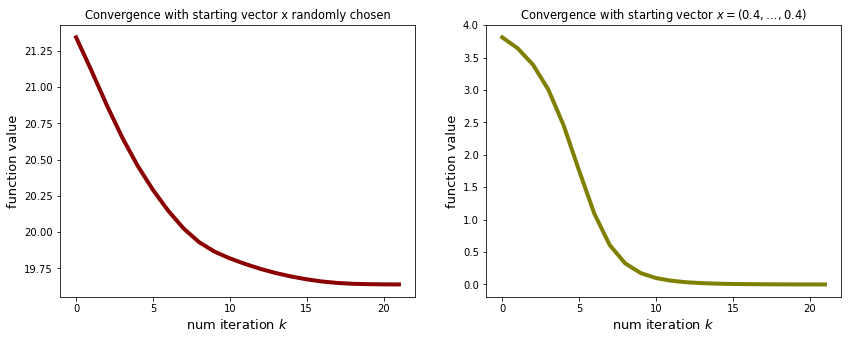

In [11]:
var3 = gradient_descent_backtrack_ackley(ackley, ackley_grad, p, 1e-6, alpha=0.1, beta=0.8, max_iter=1000) 
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(var3[:22], color='darkred', marker='',mfc='purple', linewidth=4)
axs[0].set_ylabel('function value', fontsize=13) 
axs[0].set_xlabel(r'num iteration $k$', fontsize=13) 
axs[0].set_title(r"Convergence with starting vector x randomly chosen", fontsize=11.5)

var4 = gradient_descent_backtrack_ackley(ackley, ackley_grad, 100*[0.4], 1e-06, alpha=0.1, beta=0.8, max_iter=1000)
axs[1].plot(var4[:22], color='olive', marker='',mfc='purple', linewidth=4)
axs[1].set_ylabel('function value', fontsize=13) 
axs[1].set_xlabel(r'num iteration $k$', fontsize=13) 
axs[1].set_title(r"Convergence with starting vector $x=(0.4,\ldots,0.4)$", fontsize=11.5) 
plt.show() 